<a href="https://colab.research.google.com/github/ishandahal/natural_language_toolkit/blob/main/Categorizing_Tagging_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk, pprint, re
from nltk import word_tokenize

In [2]:
nltk.download(["punkt", 'words', 'gutenberg', 'sinica_treebank', 'indian', 'mac_morpho', 'cess_cat', "averaged_perceptron_tagger", 'conll2000', "tagsets", 'brown', 'treebank', 'nps_chat', 'universal_tagset'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package sinica_treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/sinica_treebank.zip.
[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.
[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.
[nltk_data] Downloading package cess_cat to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_cat.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk

True

#### Using a Tagger

In [3]:
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [4]:
nltk.help.upenn_tagset('VBD')
nltk.help.upenn_tagset("CC.*")

VBD: verb, past tense
    dipped pleaded swiped regummed soaked tidied convened halted registered
    cushioned exacted snubbed strode aimed adopted belied figgered
    speculated wore appreciated contemplated ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


In [5]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [6]:
text = word_tokenize("The run takes place in london before we go run")
nltk.pos_tag(text)

[('The', 'DT'),
 ('run', 'NN'),
 ('takes', 'VBZ'),
 ('place', 'NN'),
 ('in', 'IN'),
 ('london', 'NN'),
 ('before', 'IN'),
 ('we', 'PRP'),
 ('go', 'VBP'),
 ('run', 'VB')]

In [7]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [8]:
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [9]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [10]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [11]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


#### Tagged Corpora
- Representing Tagged Tokens

In [12]:
tagged_token = nltk.tag.str2tuple('fly/NN')
print(tagged_token)
print(tagged_token[0])
print(tagged_token[1])

('fly', 'NN')
fly
NN


In [13]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

- Reading Tagged Corpora

In [14]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [15]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [16]:
print(nltk.corpus.nps_chat.tagged_words())
print(nltk.corpus.conll2000.tagged_words())
print(nltk.corpus.treebank.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]
[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]
[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]


In [17]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [18]:
nltk.corpus.treebank.tagged_words(tagset='universal')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

In [19]:
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [20]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [21]:
nltk.corpus.mac_morpho.tagged_words()

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [22]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [23]:
nltk.corpus.cess_cat.tagged_words()

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

- Universal Part-of-Speech Tagset

In [24]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

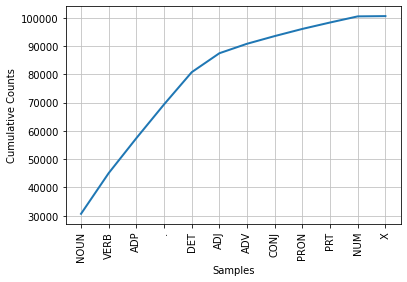

In [25]:
tag_fd.plot(cumulative=True)

- Nouns

In [26]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

- Verbs

In [27]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
print([wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB'])

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would', 'were', 'had', 'been', 'could', "'s", 'can', 'do', 'say', 'make', 'may', 'did', 'rose', 'made', 'does', 'expected', 'buy', 'take', 'get', 'might', 'sell', 'added', 'sold', 'help', 'including', 'should', 'reported', 'according', 'pay', 'compared', 'being', 'fell', 'began', 'based', 'used', 'closed', "'re", 'want', 'see', 'took', 'yield', 'offered', 'set', 'priced', 'approved', 'come', 'noted', 'cut', 'ended', 'found', 'increased', 'become', 'think', 'named', 'go', 'trying', 'proposed', 'received', 'growing', 'declined', 'held', 'give', 'came', 'use', 'put', 'making', 'continue', 'raise', 'estimated', 'called', 'paid', 'designed', 'going', 'expects', 'seeking', 'must', 'plans', 'wo', 'increasing', 'saying', 'got', 'owns', 'trading', 'acquired', 'gained', 'fined', 'reached', 'holding', 'announced', 'filed', 'became', 'seek', 'included', 'using', 'led', 'decided', 'keep', 'disclosed', 'agreed', 'find', 'failed', 'ru

In [28]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [29]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

In [30]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
print(list(cfd2['VBN']))

['named', 'used', 'caused', 'exposed', 'reported', 'replaced', 'sold', 'died', 'expected', 'diagnosed', 'studied', 'industrialized', 'owned', 'found', 'classified', 'rejected', 'outlawed', 'imported', 'tracked', 'thought', 'considered', 'elected', 'based', 'lifted', 'ensnarled', 'voted', 'been', 'held', 'banned', 'renovated', 'prolonged', 'recorded', 'accumulated', 'offered', 'become', 'guaranteed', 'proposed', 'related', 'improved', 'worried', 'cluttered', 'expedited', 'retired', 'ordered', 'collected', 'required', 'received', 'moved', 'determined', 'made', 'changed', 'completed', 'disputed', 'refunded', 'estimated', 'compared', 'located', 'filed', 'scrapped', 'anticipated', 'priced', 'set', 'applied', 'existed', 'incurred', 'reached', 'Regarded', 'paid', 'trained', 'instituted', 'vowed', 'deemed', 'combined', 'removed', 'concerned', 'complained', 'accelerated', 'believed', 'called', 'solved', 'forgiven', 'launched', 'built', 'preferred', 'raised', 'scheduled', 'brought', 'increased',

In [31]:
[w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]

[]

In [32]:
idx1 = wsj.index(('kicked', 'VBD'))
wsj[idx1-4:idx1+1]

[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

In [33]:
idx2 = wsj.index(('kicked', 'VBN'))
wsj[idx2-4:idx2+1]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

- Unsimplified Tags

In [34]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                   if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [35]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

- Exploring Tagged Corpora

In [36]:
brown_learned_text = brown.words(categories='learned')
print(sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often')))

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming', 'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', 'classified', 'colorful', 'composed', 'contain', 'differed', 'difficult', 'encountered', 'enough', 'equate', 'extremely', 'found', 'happens', 'have', 'ignored', 'in', 'involved', 'more', 'needed', 'nightly', 'observed', 'of', 'on', 'out', 'quite', 'represent', 'responsible', 'revamped', 'seclude', 'set', 'shortened', 'sing', 'sounded', 'stated', 'still', 'sung', 'supported', 'than', 'to', 'when', 'work']


In [37]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [38]:
from nltk.corpus import brown
def process(sentence):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

In [39]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for tag, _ in data[word].most_common()]
        print(word, " ".join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


In [40]:
brown_ = brown.tagged_words()

In [41]:
for tag_words in brown_:
    if tag_words[0] == 'left':
        print(tag_words)

('left', 'VBD')
('left', 'VBN')
('left', 'JJ')
('left', 'VBN')
('left', 'VBN')
('left', 'VBN')
('left', 'VBD')
('left', 'JJ')
('left', 'JJ')
('left', 'VBD')
('left', 'NR')
('left', 'JJ')
('left', 'JJ')
('left', 'JJ')
('left', 'NR')
('left', 'JJ')
('left', 'JJ')
('left', 'NR')
('left', 'NR')
('left', 'NR')
('left', 'VBD')
('left', 'VBN')
('left', 'VBD')
('left', 'JJ')
('left', 'VBD')
('left', 'VBN')
('left', 'NR')
('left', 'VBD')
('left', 'JJ')
('left', 'VBD')
('left', 'VBD')
('left', 'VBD')
('left', 'VBD')
('left', 'VBD')
('left', 'VBD')
('left', 'NR')
('left', 'VBD')
('left', 'VBD')
('left', 'VBD')
('left', 'VBD')
('left', 'NN')
('left', 'VBD')
('left', 'VBN')
('left', 'VBN')
('left', 'VBD')
('left', 'VBN')
('left', 'VBN')
('left', 'JJ')
('left', 'JJ')
('left', 'VBD')
('left', 'VBD')
('left', 'NR')
('left', 'JJ')
('left', 'JJ')
('left', 'VBN')
('left', 'VBN')
('left', 'VBN')
('left', 'VBN')
('left', 'VBN')
('left', 'VBN')
('left', 'VBN')
('left', 'VBN')
('left', 'VBN')
('left', 'VBD')

#### Mapping Words to Properties Using Python Dictionaries

- Dictionary in Python

In [42]:
pos = {}

In [43]:
pos['colorless'] = 'ADJ'
pos

{'colorless': 'ADJ'}

In [44]:
pos['ideas'] = "N"
pos['sleep'] = 'V'
pos["furiously"] = "ADV"
pos

{'colorless': 'ADJ', 'furiously': 'ADV', 'ideas': 'N', 'sleep': 'V'}

In [45]:
pos['ideas']

'N'

In [46]:
pos['colorless']

'ADJ'

In [47]:
print(list(pos))
print(sorted(pos))
print([w for w in pos if w.endswith('s')])

['colorless', 'ideas', 'sleep', 'furiously']
['colorless', 'furiously', 'ideas', 'sleep']
['colorless', 'ideas']


In [48]:
print(list(pos.keys()))
print(list(pos.values()))
print(list(pos.items()))

['colorless', 'ideas', 'sleep', 'furiously']
['ADJ', 'N', 'V', 'ADV']
[('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')]


- Defining Dictionaries

In [49]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos = dict(colorless='ADJ', ideas="N", sleep="V", furiously="ADV")

- Deafult Dictionaries

In [50]:
from collections import defaultdict
frequency = defaultdict(str)
frequency['colorless'] = 4
frequency['ideas']

''

In [51]:
pos = defaultdict(lambda : "NOUN")
pos['colorless'] = 'ADJ'
pos['blog']

'NOUN'

In [52]:
list(pos.items())

[('colorless', 'ADJ'), ('blog', 'NOUN')]

In [53]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = defaultdict(lambda: 'UNK')
for v in v1000:
    mapping[v] = v

alice2 = [mapping[v] for v in alice]
print(alice2[:100]) 
print(len(set(alice2)))

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'UNK', 'UNK', 'UNK', 'UNK', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'UNK', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'UNK', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']
1001


- Incrementally Updating a Dictionary

In [54]:
from collections import defaultdict
counts = defaultdict(int)
from nltk.corpus import brown
for word, tag in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1

print(counts['NOUN'])
print(sorted(counts))

30654
['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X']


In [55]:
from operator import itemgetter
sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [56]:
print([t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)])

['NOUN', 'VERB', 'ADP', '.', 'DET', 'ADJ', 'ADV', 'CONJ', 'PRON', 'PRT', 'NUM', 'X']


In [57]:
pair = ('NP', 8336)
pair[1]

8336

In [58]:
itemgetter(1)(pair)

8336

In [59]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
    key = word[-2:]
    last_letters[key].append(word)

print(last_letters['ly'])

['abactinally', 'abandonedly', 'abasedly', 'abashedly', 'abashlessly', 'abbreviately', 'abdominally', 'abhorrently', 'abidingly', 'abiogenetically', 'abiologically', 'abjectly', 'ableptically', 'ably', 'abnormally', 'abominably', 'aborally', 'aboriginally', 'abortively', 'aboundingly', 'abridgedly', 'abruptedly', 'abruptly', 'abscondedly', 'absently', 'absentmindedly', 'absolutely', 'absolutistically', 'absorbedly', 'absorbingly', 'absorptively', 'abstemiously', 'abstinently', 'abstractedly', 'abstractively', 'abstractly', 'abstrusely', 'absurdly', 'abundantly', 'abusedly', 'abusefully', 'abusively', 'abysmally', 'academically', 'acceleratedly', 'accentually', 'acceptably', 'acceptedly', 'accessarily', 'accessibly', 'accessively', 'accessorily', 'accidentally', 'accidently', 'accommodately', 'accommodatingly', 'accordantly', 'accordingly', 'accountably', 'accumulatively', 'accurately', 'accursedly', 'accusably', 'accusatively', 'accusatorially', 'accusingly', 'accustomedly', 'acervatel

In [60]:
print(last_letters['zy'])

['blazy', 'bleezy', 'blowzy', 'boozy', 'breezy', 'bronzy', 'buzzy', 'Chazy', 'cozy', 'crazy', 'dazy', 'dizzy', 'dozy', 'enfrenzy', 'fezzy', 'fizzy', 'floozy', 'fozy', 'franzy', 'frenzy', 'friezy', 'frizzy', 'frowzy', 'furzy', 'fuzzy', 'gauzy', 'gazy', 'glazy', 'groszy', 'hazy', 'heezy', 'Izzy', 'jazzy', 'Jozy', 'lawzy', 'lazy', 'mazy', 'mizzy', 'muzzy', 'nizy', 'oozy', 'quartzy', 'quizzy', 'refrenzy', 'ritzy', 'Shortzy', 'sizy', 'sleazy', 'sneezy', 'snoozy', 'squeezy', 'Suzy', 'tanzy', 'tizzy', 'topazy', 'trotcozy', 'twazzy', 'unbreezy', 'unfrizzy', 'wheezy', 'woozy', 'wuzzy', 'yezzy']


In [61]:
anagrams = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)

anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

- Complex Keys and Values

In [62]:
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1

In [63]:
pos[('DET', 'right')]

defaultdict(int, {'ADJ': 11, 'NOUN': 5})

- Inverting a Dictionary

In [64]:
counts = defaultdict(int)
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1

[key for (key, value) in counts.items() if value == 32]

['mortal',
 'Against',
 'Him',
 'There',
 'brought',
 'King',
 'virtue',
 'every',
 'been',
 'thine']

In [65]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for key, value in pos.items())
pos2['N']

'ideas'

In [66]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)
pos2['ADV']

['furiously', 'peacefully']

In [67]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2['ADV']

['furiously', 'peacefully']

#### Automatic Tagging

In [68]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

- The default Tagger

In [69]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [70]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [71]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

- The Regular Expression tagger

In [72]:
patterns = [
    (r'.*ing$', 'VBG'),                # gerunds
    (r'.*ed$', 'VBD'),                 # simple past
    (r'.*es$', 'VBZ'),                 # 3rd singular present
    (r'.*ould$', 'MD'),                # modals
    (r'.*\'s$', 'NN$'),                # possessive nouns
    (r'.*s$', 'NNS'),                  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN') 
]

In [73]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [74]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20186168625812995

- The Lookup Tagger

In [75]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [76]:
sent = brown.sents(categories='news')[3]
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

In [77]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

In [78]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Table Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

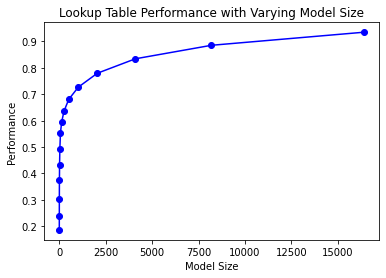

In [79]:
display()

#### N-Gram Tagging
- Unigram Tagging

In [80]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [81]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

- Separating the Training and Testing Data

In [83]:
size = int(len(brown_tagged_sents) * 0.9)
print(size)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

4160


0.8121200039868434

- General N-Gram Tagging

In [84]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [85]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

In [86]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

- Combining Taggers

In [89]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

In [90]:
t3 = nltk.TrigramTagger(train_sents, backoff=t2)
t3.evaluate(test_sents)

0.843317053722715

- Tagging Unknown Words

- Storing Taggers

In [91]:
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [92]:
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [93]:
text = '''The board's action shows what free enterprise
is up against in our complex maze of regulatory laws .'''
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]

- Performance Limitations

In [99]:
cfd = nltk.ConditionalFreqDist(
        ((x[1], y[1], z[0]), z[1])
        for sent in brown_tagged_sents
        for x, y, z in nltk.trigrams(sent))
ambigious_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1]
sum(cfd[c].N() for c in ambigious_contexts) / cfd.N()

0.049297702068029296

In [100]:
test_tags = [tag for sent in brown.sents(categories='editorial')
                 for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags, test_tags))

           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

#### Transformation-Based Tagging

In [101]:
from nltk.tbl import demo as brill_demo
brill_demo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  